[BernoulliRBM] Iteration 1, pseudo-likelihood = -11.43, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -19.72, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -19.81, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -30.40, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -35.10, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -30.73, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -37.59, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -40.24, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -42.41, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -51.72, time = 0.02s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -44.39, time = 0.01s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -54.14, time = 0.01s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -53.77, time = 0.01s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -43.99, time = 0.01s
[BernoulliRBM] Iteration 15, 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.2898
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3782
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3408
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3307
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3145
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3033
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2974
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2823
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2893
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2827
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2768
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2732
Epoch 13/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2794
Epoch 14/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2600
Epoch 15/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

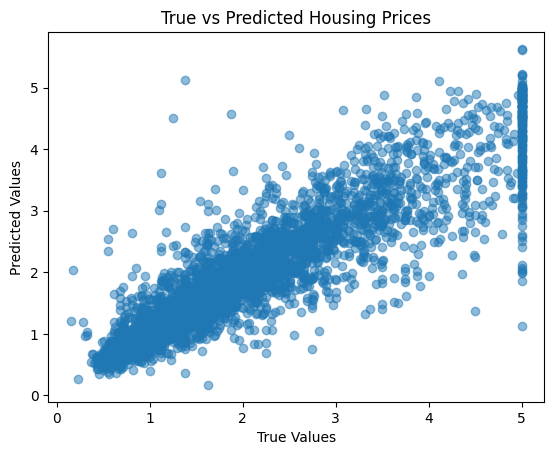

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine  # Use load_wine to load the Wine dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load the Wine dataset
wine = load_wine()
X, y = wine['data'], wine['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the RBM and Logistic Regression
rbm = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=20, verbose=1)

logistic = LogisticRegression(max_iter=1000)

# Create the pipeline
dbn_pipeline = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Fit the model
dbn_pipeline.fit(X_train_scaled, y_train)

# Evaluate the model
dbn_score = dbn_pipeline.score(X_test_scaled, y_test)
print(f"DBN Classification score: {dbn_score}")



#code 2
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data.data
y = data.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

class DBM:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.model = self.build_model()

    def build_model(self):
        model = models.Sequential()

        # Add the first hidden layer
        model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
        model.add(layers.Dense(self.layer_sizes[0], activation='relu'))

        for size in self.layer_sizes[1:]:
            model.add(layers.Dense(size, activation='relu'))

        model.add(layers.Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        return model

    def train(self, X_train, y_train, epochs=50, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def evaluate(self, X_test, y_test):
        loss = self.model.evaluate(X_test, y_test)
        return loss

    def predict(self, X):
        return self.model.predict(X)

dbm = DBM(layer_sizes=[256, 128, 64])

dbm.train(X_train, y_train, epochs=50, batch_size=32)

test_loss = dbm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

y_pred = dbm.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Housing Prices')
plt.show()

